## Importing transformers pretrained model

In [2]:
from transformers import AutoTokenizer, AutoModel, BertLMHeadModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-small-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-small-uncased")

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Tokenize

In [17]:
text = """
An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. The district court granted the petition and vacated Mr. Magwood's death sentence.
On appeal, the U.S. Court of Appeals for the Eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. The court also held that Mr. Magwood's counsel was not ineffective because he failed to raise an argument that had already been decided by the state's highest court adverse to his client's position.
"""

In [18]:
ids = tokenizer.encode(text)
ids

[101,
 237,
 6754,
 264,
 240,
 3276,
 2112,
 195,
 11752,
 7173,
 3664,
 210,
 4127,
 212,
 4205,
 700,
 211,
 1466,
 117,
 1908,
 115,
 237,
 6754,
 522,
 483,
 240,
 1680,
 301,
 614,
 553,
 117,
 7173,
 3664,
 110,
 163,
 1497,
 217,
 522,
 4755,
 5703,
 1322,
 117,
 207,
 240,
 3232,
 275,
 2217,
 310,
 4893,
 207,
 264,
 240,
 211,
 3212,
 236,
 8603,
 460,
 372,
 18172,
 553,
 117,
 7173,
 3664,
 117,
 306,
 18172,
 115,
 207,
 264,
 240,
 4205,
 553,
 117,
 7173,
 3664,
 211,
 1466,
 1831,
 2096,
 117,
 553,
 117,
 7173,
 3664,
 678,
 145,
 450,
 1497,
 217,
 522,
 4755,
 5703,
 1322,
 225,
 207,
 522,
 483,
 240,
 5438,
 216,
 145,
 1263,
 525,
 246,
 4349,
 301,
 740,
 213,
 275,
 256,
 212,
 216,
 300,
 6357,
 440,
 661,
 236,
 3334,
 117,
 207,
 483,
 240,
 614,
 207,
 1497,
 212,
 6672,
 553,
 117,
 7173,
 3664,
 110,
 163,
 1466,
 1091,
 117,
 222,
 615,
 115,
 207,
 165,
 117,
 163,
 117,
 240,
 210,
 1409,
 217,
 207,
 6116,
 881,
 5133,
 115,
 1108,
 216,
 4239,
 245,


In [19]:
tokenizer.decode(ids)

"[CLS] an alabama state court convicted billy joe magwood of murder and sentenced him to death. subsequently, an alabama federal district court partially granted mr. magwood's petition for federal habeas corpus relief. the court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing mr. magwood. upon resentencing, the state court sentenced mr. magwood to death once again. mr. magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. the district court granted the petition and vacated mr. magwood's death sentence. on appeal, the u. s. court of appeals for the eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. the court also held that mr. magwood's counsel was not ineffective because he f

In [20]:
import torch

It has a generate method that expects a batch of prompt, so we feed it our ids and add one batch dimension (there is a padding warning we can ignore as well):

In [21]:
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

TypeError: The current model class (BertModel) is not compatible with `.generate()`, as it doesn't have a language model head. Please use one of the following classes instead: {'BertLMHeadModel'}

In [10]:
preds.shape,preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [11]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

# Bridging the gap with fastai

In [22]:
from fastai.text.all import *

In [23]:
import os
from pathlib import Path

path = Path(os.getcwd() + '/datasets')

In [24]:
train = pd.read_csv(path / 'train.csv')
test = pd.read_csv(path / 'test.csv')
submission = pd.read_csv(path / 'sample_submission.csv')

In [25]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson di...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the g...",0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.","An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he l...",1
3,TRAIN_0003,Linkletter,Walker,"Victor Linkletter was convicted in state court on evidence illegally obtained by police prior to the Supreme Court decision concerning the Fourth Amendment in Mapp v. Ohio. Mapp applied the exclusionary rule to state criminal proceedings, denying the use of illegally obtained evidence at trial. Linkletter argued for a retrial based on the Mapp decision.\n",0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intruder broke into the apartment of the daughter of the city mayor. The daughter and the intruder struggled through several rooms until she was able to seize his knife, and he fled. The assailant had a towel over his head, so the victim could not identify the defendant during the trial. The police apprehended William Earl Fikes on the basis of a call from a private citizen and held him “on an open charge of investigation.” The police questioned Fikes for hours, placed him in jail, and limited his access to anyone familiar. After nearly a week of thi...",1


In [26]:
all_texts = train['facts'].values

## Importing Libraries & Data Preparation

In [28]:
import numpy as np
import pandas as pd

from pathlib import Path
from typing import *

import torch
import torch.optim as optim

import gc
gc.collect()

821

In [29]:
from fastai import *
from fastai.text import *

import sys

from fastai.callback.tracker import EarlyStoppingCallback
from fastai.callback.tracker import SaveModelCallback

As mentioned in the article in first section, we will change the tokenizer of Fastai to incorporate BertTokenizer. One important thing to note here is to change the start and end of each token with [CLS] and [SEP] which is a requirement of BERT.



## fastai Transform

In [31]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [36]:
len(all_texts)

2478

In [37]:
# train:valid = 0.85:0.15
splits = [list(range(0, 2100)), list(range(2100, len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [35]:
tls.train[0], tls.valid[0]

(tensor([  222,   557,   554,   115,  4456,   115, 13927,   719,   117,  1824,
          3519,   115,   145,  4064,   217,   408,   648,   115,   280,   145,
          3332,  5562,   213, 22227, 18765,   175,   115,  5733,   117,   391,
           226,  5562,   115,   719,   117,  1824,  3519,  2693,   275,  1897,
         13351,   210,   472,   145, 13890,   212,   210,   472,  1325,   213,
           797,   704,   225,   207,  1734,   210,   207,   958, 16936,   189,
           403,   117,  1700,   115,   719,   117,  1824,  3519, 11933, 14834,
          7065,   115,   237,  2595, 22227, 18765,   175,  3393,  7639,   115,
           213,   145,  1286,   211,  3620,  1364,   317,   207, 16936,   189,
           403,   212,   719,   117,  1824,  3519,   100,   163,  1897, 13351,
           117,  7065,  6273,  6047,   719,   117,  1824,  3519,   217,  7311,
           860,   117,  5733,   100,   163,   296,   881,   240,   210,  1409,
          5133,   115,  1108,   216,  7065,   503,  

In [38]:
show_at(tls.train, 0)

on june 27, 1962, phil st. amant, a candidate for public office, made a television speech in baton rouge, louisiana. during this speech, st. amant accused his political opponent of being a communist and of being involved in criminal activities with the head of the local teamsters union. finally, st. amant implicated herman thompson, an east baton rouge deputy sheriff, in a scheme to move money between the teamsters union and st. amant [UNK] s political opponent. thompson successfully sued st. amant for defamation. louisiana [UNK] s first circuit court of appeals reversed, holding that thompson did not show st. amant acted with [UNK] malice. [UNK] thompson then appealed to the supreme court of louisiana. that court held that, although public figures forfeit some of their first amendment protection from defamation, st. amant accused thompson of a crime with utter disregard of whether the remarks were true. finally, that court held that the first amendment protects uninhibited, robust deb

In [39]:
show_at(tls.valid, 0)

on august 24, 1954, william link sued wabash railroad company over injuries he received when his car ran into a wabash railroad train at a crossing. after six years of motions, a pretrial hearing was set for october 12, 1960. on october 11, 1960, link [UNK] s attorney contacted the wabash railroad attorney to inform him that he was doing work in indianapolis and would miss a deposition that was set to happen before the hearing. the next morning, link [UNK] s lawyer called the courthouse to notify the judge that he was detained in indianapolis filing papers for a case before the iowa supreme court. he said he could not make it to court that day but was available both of the next two days. two hours after the pretrial was supposed to start, the court found that link [UNK] s lawyer had not provided a sufficient reason for missing the hearing and dismissed the case [UNK] for failure to prosecute the action. [UNK] the united states court of appeals for the seventh circuit affirmed.


In [40]:
bs, sl = 4, 256
dls = tls.dataloaders(bs=bs, seq_len=sl)

Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors


In [41]:
dls.show_batch(max_n=2)

,text,text_
0,"the university of wisconsin, a public university, requires students to pay an activity fee. the fee supports various campus services and extracurricular student activities including the future financial gurus of america ; the international socialist organization ; the college democrats and republicans ; and the american civil liberties union campus chapter. scott harold southworth filed suit against the university, alleging that the fee violated his rights of free speech, free association, and free exercise under the first amendment. southworth argued that the university must grant him the choice not to fund registered student organizations ( rso ) that engage in political and ideological expression offensive to his personal beliefs. in granting southworth judgment, the federal district court concluded that the fee program compelled students to support political and ideological activities with which they disagree in violation of their first amendment rights to freedom of speech and association. the court declared","university of wisconsin, a public university, requires students to pay an activity fee. the fee supports various campus services and extracurricular student activities including the future financial gurus of america ; the international socialist organization ; the college democrats and republicans ; and the american civil liberties union campus chapter. scott harold southworth filed suit against the university, alleging that the fee violated his rights of free speech, free association, and free exercise under the first amendment. southworth argued that the university must grant him the choice not to fund registered student organizations ( rso ) that engage in political and ideological expression offensive to his personal beliefs. in granting southworth judgment, the federal district court concluded that the fee program compelled students to support political and ideological activities with which they disagree in violation of their first amendment rights to freedom of speech and association. the court declared the"
1,"federal district court, arguing that he was denied effective assistance of counsel at both the guilt and sentencing phases of his trial. the district court upheld pinholster's conviction but granted habeas relief on his death sentence. a panel of the ninth circuit reversed. during rehearing en banc, the ninth circuit vacated the panel opinion and affirmed the district court [UNK] s grant of habeas relief, holding that the denial of habeas relief during the guilt phase was appropriate, but not during the penalty phase. the court noted that strickland v. washington requires trial counsel to investigate mitigating evidence at the penalty phase. here, the court reasoned that pinholster's counsel failed meet to meet his obligations. williams was arrested for the murder of a ten - year - old girl who's body he disposed of along a gravel road. state law enforcement officials engaged in a massive search for the child's","district court, arguing that he was denied effective assistance of counsel at both the guilt and sentencing phases of his trial. the district court upheld pinholster's conviction but granted habeas relief on his death sentence. a panel of the ninth circuit reversed. during rehearing en banc, the ninth circuit vacated the panel opinion and affirmed the district court [UNK] s grant of habeas relief, holding that the denial of habeas relief during the guilt phase was appropriate, but not during the penalty phase. the court noted that strickland v. washington requires trial counsel to investigate mitigating evidence at the penalty phase. here, the court reasoned that pinholster's counsel failed meet to meet his obligations. williams was arrested for the murder of a ten - year - old girl who's body he disposed of along a gravel road. state law enforcement officials engaged in a massive search for the child's body."


## Fine-tuning the model

In [60]:
from transformers import BertLMHeadModel

model = BertLMHeadModel.from_pretrained("nlpaueb/legal-bert-base-uncased", is_decoder=True)

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [61]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [62]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [63]:
learn.validate()

(#2) [11.054449081420898,63224.62109375]

SuggestedLRs(valley=6.30957365501672e-05)

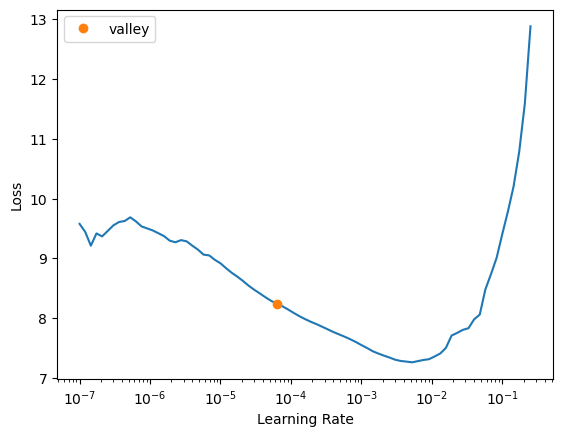

In [64]:
learn.lr_find()

In [65]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.607005,3.350775,28.524826,04:02


/Users/ridealist/miniconda3/envs/nlp/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/Users/ridealist/miniconda3/envs/nlp/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=3.311311274956097e-06)

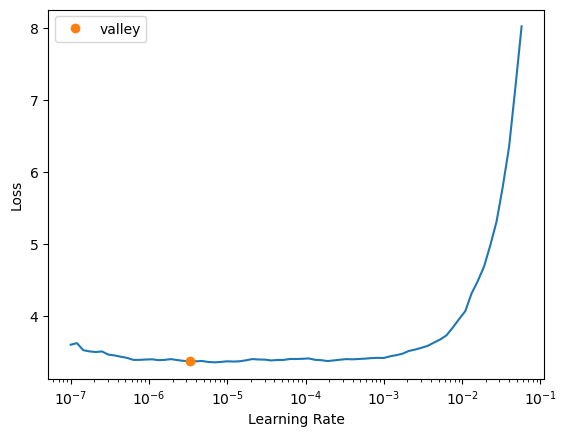

In [96]:
learn.lr_find()

In [97]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,perplexity,time
0,3.332638,3.259856,26.045786,19:16
1,3.221056,3.205770,24.674480,03:38
2,3.185018,3.195088,24.412331,03:35


## Inference

In [105]:
text = """
the union transmitted a letter to the company notifying the company of its desire to modify the agreement.
Representatives of the company and the union first met on August 29, 1951 to discuss the proposed amendments.
The two groups held 37 more meetings between that date and April 30, 1952, but no agreement was reached.
On April 30, employees of the company went on strike, demanding wage increases and other benefits.
Neither the company nor the union notified the other that it intended to terminate the contract.
On June 21, 1952, the union offered to return all striking employees to work unconditionally, but the company refused this offer.
The company distributed a letter to the union explaining that there would be no reinstatement of workers unless the employees agreed to work for a period of at least one year without work stoppage.
After June 21, the company interviewed individual employees and rehired only those who assured the company that they would continue to work daily throughout the strike.
On August 3, 1952, a new agreement was executed between the company and the union; employees were reinstated the next day.
"""

In [99]:
prompt = "the union transmitted a letter to the company notifying"

In [100]:
tensor(prompt_ids)

tensor([ 101,  207,  403, 3691,  145,  671,  211,  207,  243, 1227,  235,  102])

In [101]:
tensor(prompt_ids)[1:-1]

tensor([ 207,  403, 3691,  145,  671,  211,  207,  243, 1227,  235])

In [102]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[1:-1][None].to('mps')
inp.shape

torch.Size([1, 10])

In [103]:
preds = learn.model.generate(inp, max_length=200, num_beams=5, temperature=2.0)

In [104]:
tokenizer.decode(preds[0].cpu().numpy())

"the union transmitted a letter to the company notifying the company that the company had not received a letter from the union. the company then sent the letter to the union. the company then sent the letter to the union. the union appealed to the u. s. court of appeals for the federal circuit, which affirmed the lower court's decision. the union appealed to the u. s. court of appeals for the federal circuit, which affirmed the lower court's decision. the u. s. court of appeals for the federal circuit affirmed the lower court's decision. the u. s. court of appeals for the federal circuit affirmed the lower court's decision. the u. s. court of appeals for the federal circuit affirmed the lower court's decision. the u. s. court of appeals for the federal circuit affirmed the lower court's decision. the u. s. court of appeals for the federal circuit affirmed the lower court's decision and held that"

In [ ]:
class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""
    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int=128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]